In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.stats import unitary_group
#from sympy.physics.matrices import msigma
#from sympy.physics.quantum import TensorProduct
from numpy import linalg as LA
from numpy.linalg import eig
from sympy import Matrix
from sympy.physics.quantum.dagger import Dagger
#----------------
set_ro_d = [] 
set_state = []
set_state_dager = []
density_matrix = []
sig_prdct = []
Entangled_state = []
Separable_state = []
good_ro = []
bad_ro = []
Exp_sum = []
ExpG_good = []
#----------------
d = 4
num_state = 10
num_denmet = 10000
min_rand = 0
max_rand = 10
I = 1j
#-----------------
sigma_x = np.array([[0,1],
                    [1,0]])
sigma_y = np.array([[0,-I],
                    [I,0]])
sigma_z = np.array([[1,0],
                    [0,-1]])

sigma = [sigma_x ,sigma_y ,sigma_z]
#-----------------
for i in range(0,3):
    for j in range(0,3):
        t = np.kron(sigma[i],sigma[j])
        sig_prdct.append(t)        
        
        
for i in range(num_denmet):
    def generate_diagonal_elements(d):
    # Generate n random numbers following Dirichlet distribution
        random_numbers = np.random.dirichlet(np.ones(d))
        return random_numbers

    diagonals = generate_diagonal_elements(d)

    set_ro_d.append(diagonals*np.identity(d))    
    
for i in range(num_state):
    def random_unitary(d):
        # Generate a random complex matrix
        X = np.random.randn(d, d) + I * np.random.randn(d, d)
    
        # QR decomposition
        Q, R = np.linalg.qr(X)
    
        # Create a diagonal matrix with phase factors
        D = np.diag(np.diag(R) / np.abs(np.diag(R)))
    
        # Construct the unitary matrix
        U = np.dot(Q, D)
    
        return U
 
    set_state.append(random_unitary(d))
    #set_state_dager.append(Dagger(random_unitary(d)))

for q in range(num_denmet):
    for j in range(num_state):
        
        
        ro = set_state[j]@set_ro_d[q]@Dagger(set_state[j])
        density_matrix.append(ro)
      
       

In [34]:
concurrence = []
for i in range(len(density_matrix)):
    ro_tilda = np.kron(sigma_y,sigma_y)@np.conj(density_matrix[i])@np.kron(sigma_y,sigma_y)
    R = density_matrix[i]@ro_tilda

    eigval , eigvec = np.linalg.eig(R)
    sort_eig = np.sqrt(np.sort(eigval))
    landa = sort_eig[3]-sort_eig[2]-sort_eig[1]-sort_eig[0]
    c = max(0,landa)
    concurrence.append(abs(c))


In [35]:
nnn = np.count_nonzero(concurrence)
percent = (nnn*100)/(num_denmet*num_state)
print(percent,"%" " of the generated random states are Entangled state as far as concurrence can tell")

37.069 % of the generated random states are Entangled state as far as concurrence can tell


In [36]:
pty = []
for i in range(num_denmet*num_state):
    
    purity_u = np.trace(abs(density_matrix[i]@density_matrix[i].conj().T))
    pty.append(purity_u)

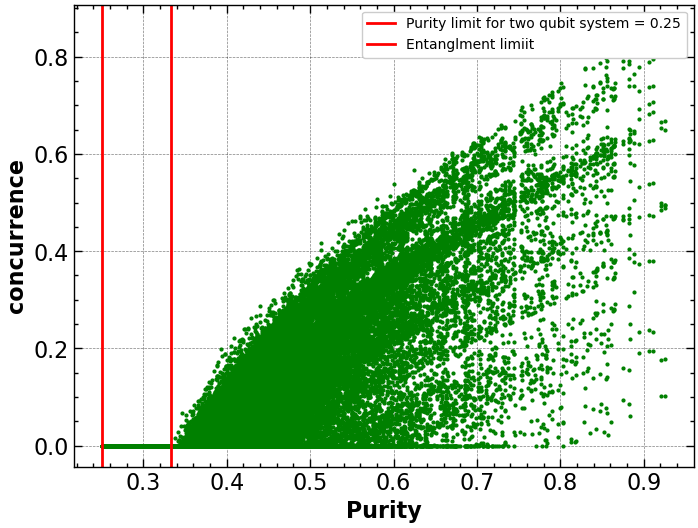

In [37]:
import scienceplots
plt.style.use(['science','notebook','grid'])


plt.plot(pty,concurrence,'o',ms = 2,color = 'green')

plt.axvline(0.25, color = 'red',label='Purity limit for two qubit system = 0.25')
plt.axvline(0.333333333, color = 'red',label='Entanglment limiit')
plt.ylabel('concurrence')
plt.xlabel('Purity')
plt.legend(loc='upper right' , fontsize=10)
plt.show()

In [38]:
density_matrix_T_A = []
density_matrix_T_B = []
for i in range(len(density_matrix)):
    BB = np.split(density_matrix[i], 2, axis=1)
    BB0 = np.split(BB[0] , 2, axis=0)
    BB1 = np.split(BB[1] , 2, axis=0)
    B00 = BB0[0]
    B01 = BB1[0]
    B10 = BB0[1]
    B11 = BB1[1]
    h1A = np.concatenate((B00,B10), axis=1)
    h2A = np.concatenate((B01,B11), axis=1)
    partial_A = np.concatenate((h1A,h2A), axis=0)
    density_matrix_T_A.append(partial_A)
    h1B = np.concatenate((B00.T,B01.T), axis=1)
    h2B = np.concatenate((B10.T,B11.T), axis=1)
    partial_B = np.concatenate((h1B,h2B), axis=0)
    density_matrix_T_B.append(partial_B)

In [39]:
#calculating the Negativity
Negativity = []
for i in range(len(density_matrix_T_B)):
    eigval , eigvec = np.linalg.eig(density_matrix_T_B[i])
    negs = [] 
    for j in range(len(eigval)):   
        N = eigval[j].real
        if N<0:
            negs.append(N)
    N_sum = sum(negs)
    N_ro = 2*max(0,abs(N_sum))
    Negativity.append(N_ro)

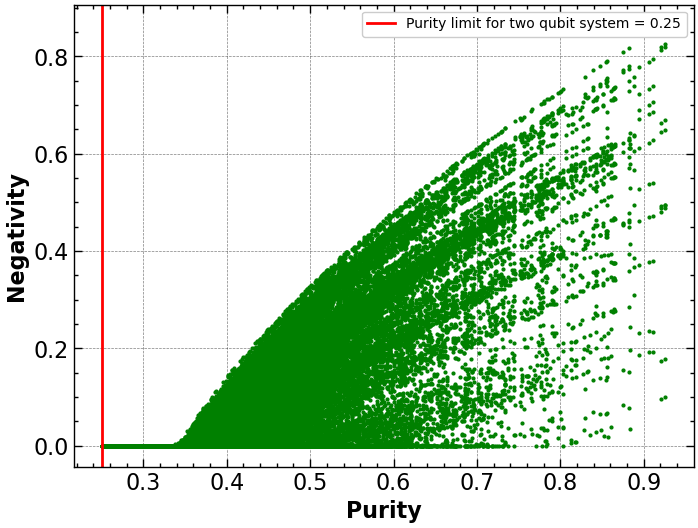

In [40]:
import scienceplots
plt.style.use(['science','notebook','grid'])


plt.plot(pty,Negativity,'o',ms = 2,color = 'green')

plt.axvline(0.25, color = 'red',label='Purity limit for two qubit system = 0.25')

plt.ylabel('Negativity')
plt.xlabel('Purity')
plt.legend(loc='upper right' , fontsize=10)
plt.show()

In [41]:
non = np.count_nonzero(Negativity)
percent = (non*100)/(num_denmet*num_state)
print(percent,"%" " of the generated random states are Entangled state as far as Negativity can tell")

37.069 % of the generated random states are Entangled state as far as Negativity can tell


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

In [10]:
mpl.rcParams['text.latex.preamble'] = r'\boldmath'

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['xtick.direction'] = 'inout'

mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['ytick.direction'] = 'inout'

mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.labelweight'] = 'bold'

mpl.rcParams['figure.titlesize'] = 14



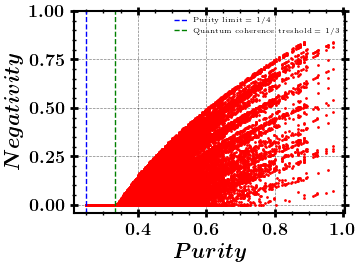

In [28]:
fig, ax = plt.subplots()

ax.plot(pty,Negativity,'o', color='red' , ms=1)
ax.set_ylabel(r'$Negativity$')
ax.set_xlabel(r'$Purity$')
#ax.set_ylim(0.01, 0.09)
#ax.set_xlim(-0.05e6, 3e6)
ax.axvline(0.25, color = 'blue',label='Purity limit = 1/4',linestyle='--')
ax.axvline(0.333, color = 'green',label='Quantum coherence treshold = 1/3',linestyle='--')
plt.ylim(top=1)
plt.legend(loc='best' , fontsize=5)


#fig.suptitle(r'A4')
plt.savefig('neg_purity.png', dpi=400)
plt.show()

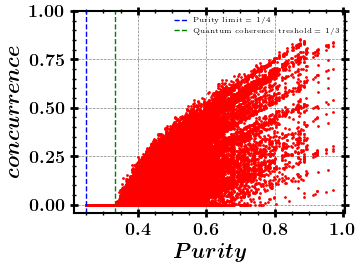

In [29]:
fig, ax = plt.subplots()

ax.plot(pty,concurrence,'o', color='red' , ms=1)
ax.set_ylabel(r'$concurrence$')
ax.set_xlabel(r'$Purity$')
#ax.set_ylim(0.01, 0.09)
#ax.set_xlim(-0.05e6, 3e6)
ax.axvline(0.25, color = 'blue',label='Purity limit = 1/4',linestyle='--')
ax.axvline(0.333, color = 'green',label='Quantum coherence treshold = 1/3',linestyle='--')
plt.ylim(top=1)
plt.legend(loc='best' , fontsize=5)


#fig.suptitle(r'A4')
plt.savefig('concurr_purity.png', dpi=400)
plt.show()

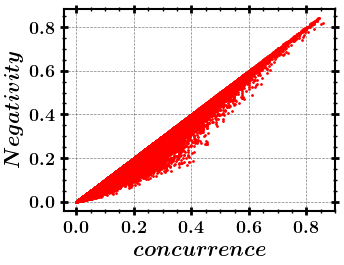

In [30]:
fig, ax = plt.subplots()

ax.plot(concurrence , Negativity,'o', color='red' , ms=1)
ax.set_ylabel(r'$Negativity$')
ax.set_xlabel(r'$concurrence$')



#fig.suptitle(r'A4')
plt.savefig('negativ_concurr.png', dpi=400)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


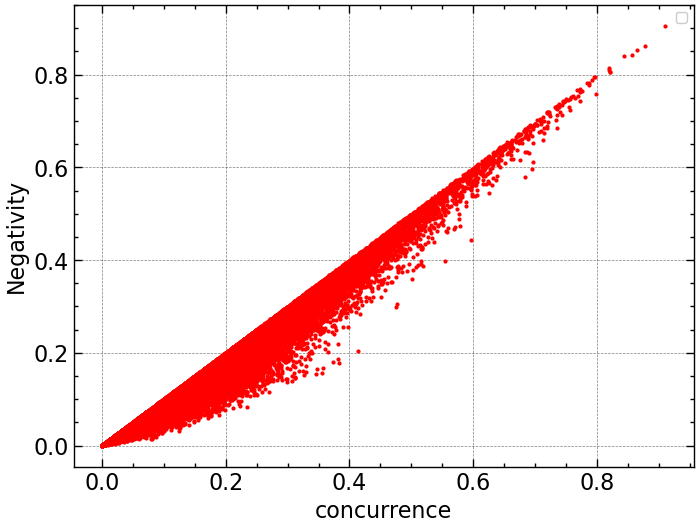

In [8]:

import scienceplots
plt.style.use(['science','notebook','grid'])


plt.plot(concurrence , Negativity , 'o' , color='red' , ms=2)


plt.ylabel('Negativity')
plt.xlabel('concurrence')
plt.legend(loc='upper right' , fontsize=10)
plt.show()

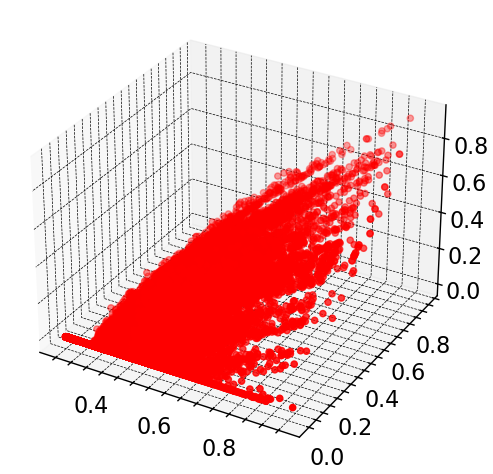

In [17]:
from mpl_toolkits import mplot3d

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.scatter(pty, Negativity, concurrence ,color ='red' )
#ax.set_title('3D line plot geeks for geeks')
plt.show()